In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("21-housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

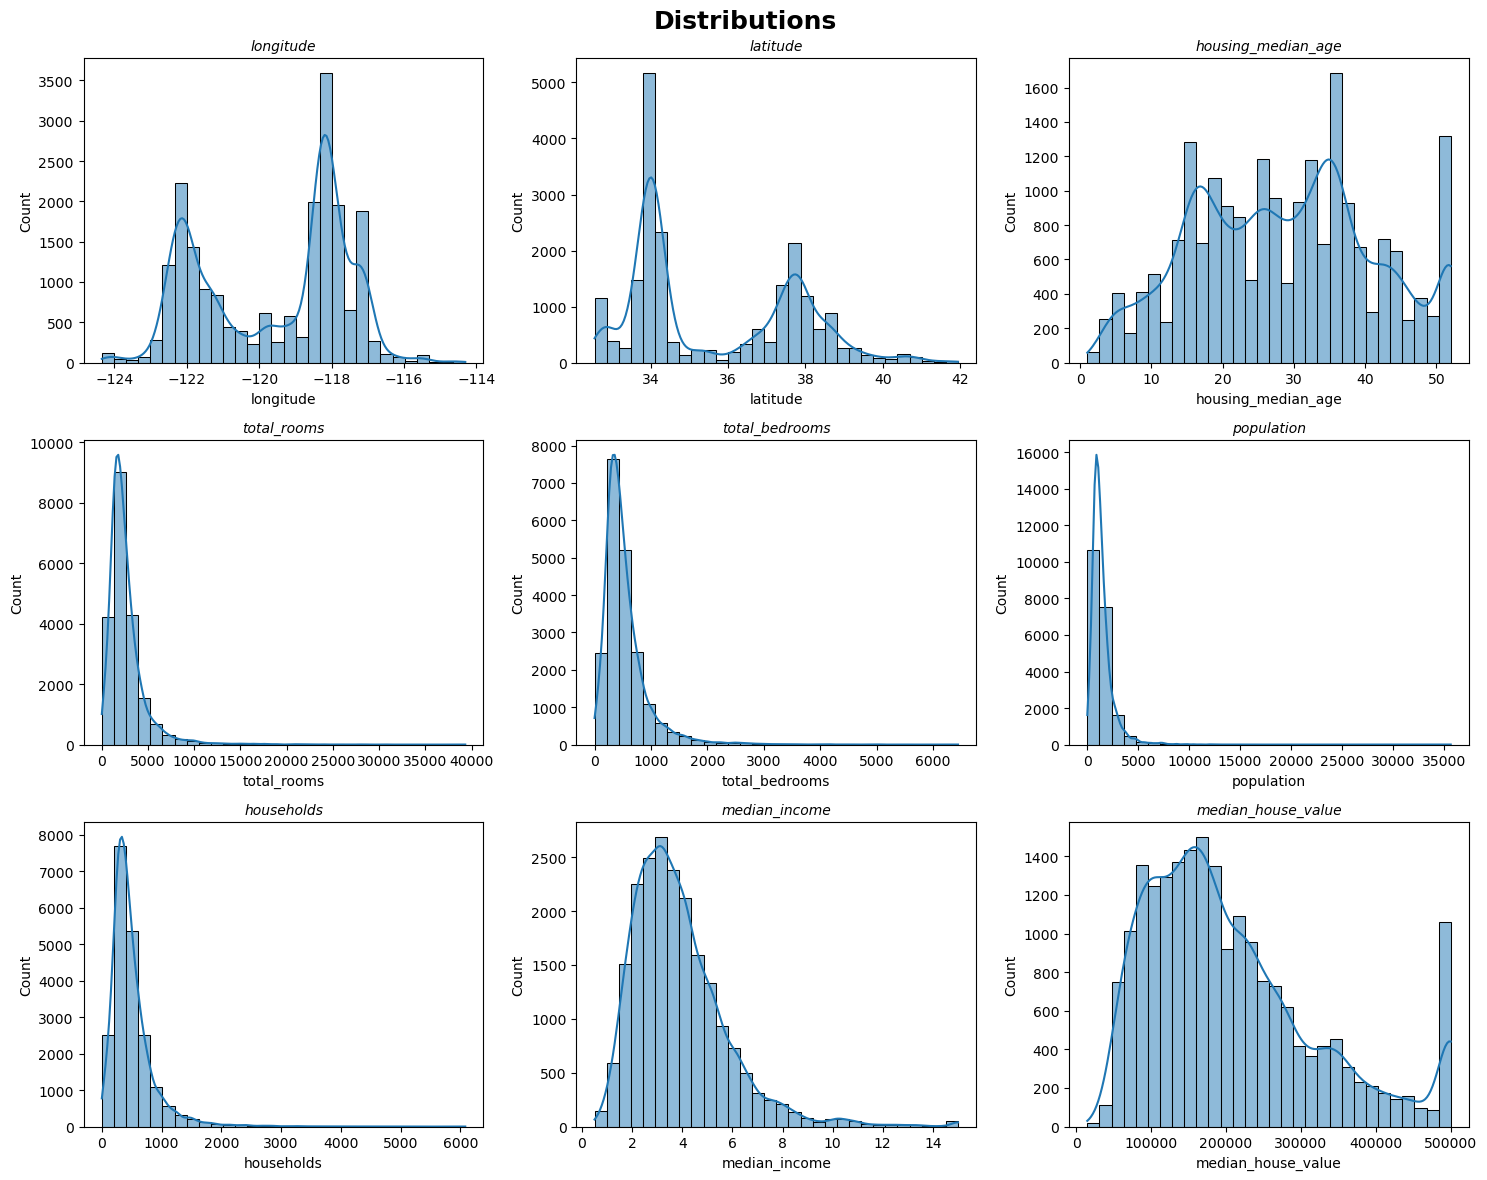

In [9]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [10]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [11]:
df.select_dtypes("float64").columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
def find_outliers_iqr(df, threshold=1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3- Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)     

In [13]:
find_outliers_iqr(df, threshold=1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [14]:
# outlierlar var diye bütün datayı temizlemek çok mantıklı değil,özellikle dependent featureda yani median house value da outlierları çıkarsak
# çok mantıklı olur. target kolonda outlierlar oldukça model daha çok zorlancaktır. diğer taraftada outlierlar çok sıkıntı çıkarmayabilir çünkü
# decision tree bazlı bir algoritma kullanıyoruz. ama y kolonunda olmasdı sıkıntı çıaracaktır.

In [15]:
def remove_outliers_from_columns(df, target_col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3- Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [16]:
def remove_outliers_from_all_columns(df, threshold=1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3- Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [17]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_columns(df, "median_house_value")
print("only target columns cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target columns cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [18]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [20]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\Semih Neccar\AppData\Local\Temp\ipykernel_21732\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [21]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,538.841739,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,420.612109,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,299.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,645.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [22]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [24]:
df_target_clean = pd.get_dummies(df_target_clean, columns= ["ocean_proximity"], drop_first=True)

In [25]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [26]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [28]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [29]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) # fonskiyonun adı r2 score
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "LightGBM Regressor" : LGBMRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [32]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  59377.10592926239
Mean Absolute Error:  43858.387482411
R2 Score:  0.610423647092475
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58769.54725739215
Mean Absolute Error:  43594.3638630081
R2 Score:  0.6263296157229521
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  59377.14466856272
Mean Absolute Error:  43859.00858534629
R2 Score:  0.6104231387510857
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  58768.462304422465
Mean Absolute Error:  43594.66878006593
R2 Score:  0.6263434123598097
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  59381.16868007145
Mean Absolute Error:  43864.677314937166
R2 Score:  0.6103703334199277
-----------------------------------
Model performance for Test Set
Root Mean Squared Er

In [33]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv=3, n_jobs=-1, random_state=15)

In [36]:
randomized_cv.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'learning_rate': [0.1, 0.01], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,15
,error_score,nan


In [37]:
randomized_cv.best_params_

{'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [38]:
model = XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.1, colsample_bytree=0.7)

In [39]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [40]:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  7613.154213224686
Mean Absolute Error:  5334.464109937924
R2 Score:  0.9935955212426344
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  41313.12405650057
Mean Absolute Error:  27913.50478184615
R2 Score:  0.8153454289986122
-----------------------------------




In [41]:
lgb_param = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
randomized_cv_lgb = RandomizedSearchCV(estimator=LGBMRegressor(verbosity=-1), param_distributions=lgb_param, cv=3, verbose=0,
random_state=15, scoring="neg_root_mean_squared_error", n_jobs = -1)

In [44]:
randomized_cv_lgb.fit(X_train, y_train)

,estimator,LGBMRegressor(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 5, ...], 'min_child_samples': [10, 20, ...], ...}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,15
,error_score,nan


In [45]:
randomized_cv_lgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 1.0,
 'num_leaves': 70,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [46]:
model1 = LGBMRegressor(subsample=0.8, reg_lambda=0, reg_alpha=1.0, num_leaves=70, n_estimators=300, min_child_samples=20,
max_depth=10, learning_rate=0.1, colsample_bytree=0.6)

In [47]:
model1.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,70
,max_depth,10
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [48]:
    y_train_pred1 = model1.predict(X_train)
    y_test_pred1 = model1.predict(X_test)
    
    model_train_mae1, model_train_rmse1, model_train_r2_1 = evaluate_model(y_train, y_train_pred1)
    model_test_mae1, model_test_rmse1, model_test_r2_1 = evaluate_model(y_test, y_test_pred1)

    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse1)
    print("Mean Absolute Error: ", model_train_mae1)
    print("R2 Score: ", model_train_r2_1)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse1)
    print("Mean Absolute Error: ", model_test_mae1)
    print("R2 Score: ", model_test_r2_1)

    print("-----------------------------------")
    print("\n")

Model performance for Training Set
Root Mean Squared Error:  21841.03541031167
Mean Absolute Error:  15454.824658896903
R2 Score:  0.9472890332623076
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  40465.69420805889
Mean Absolute Error:  27291.078372579002
R2 Score:  0.8228431379163377
-----------------------------------




In [49]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

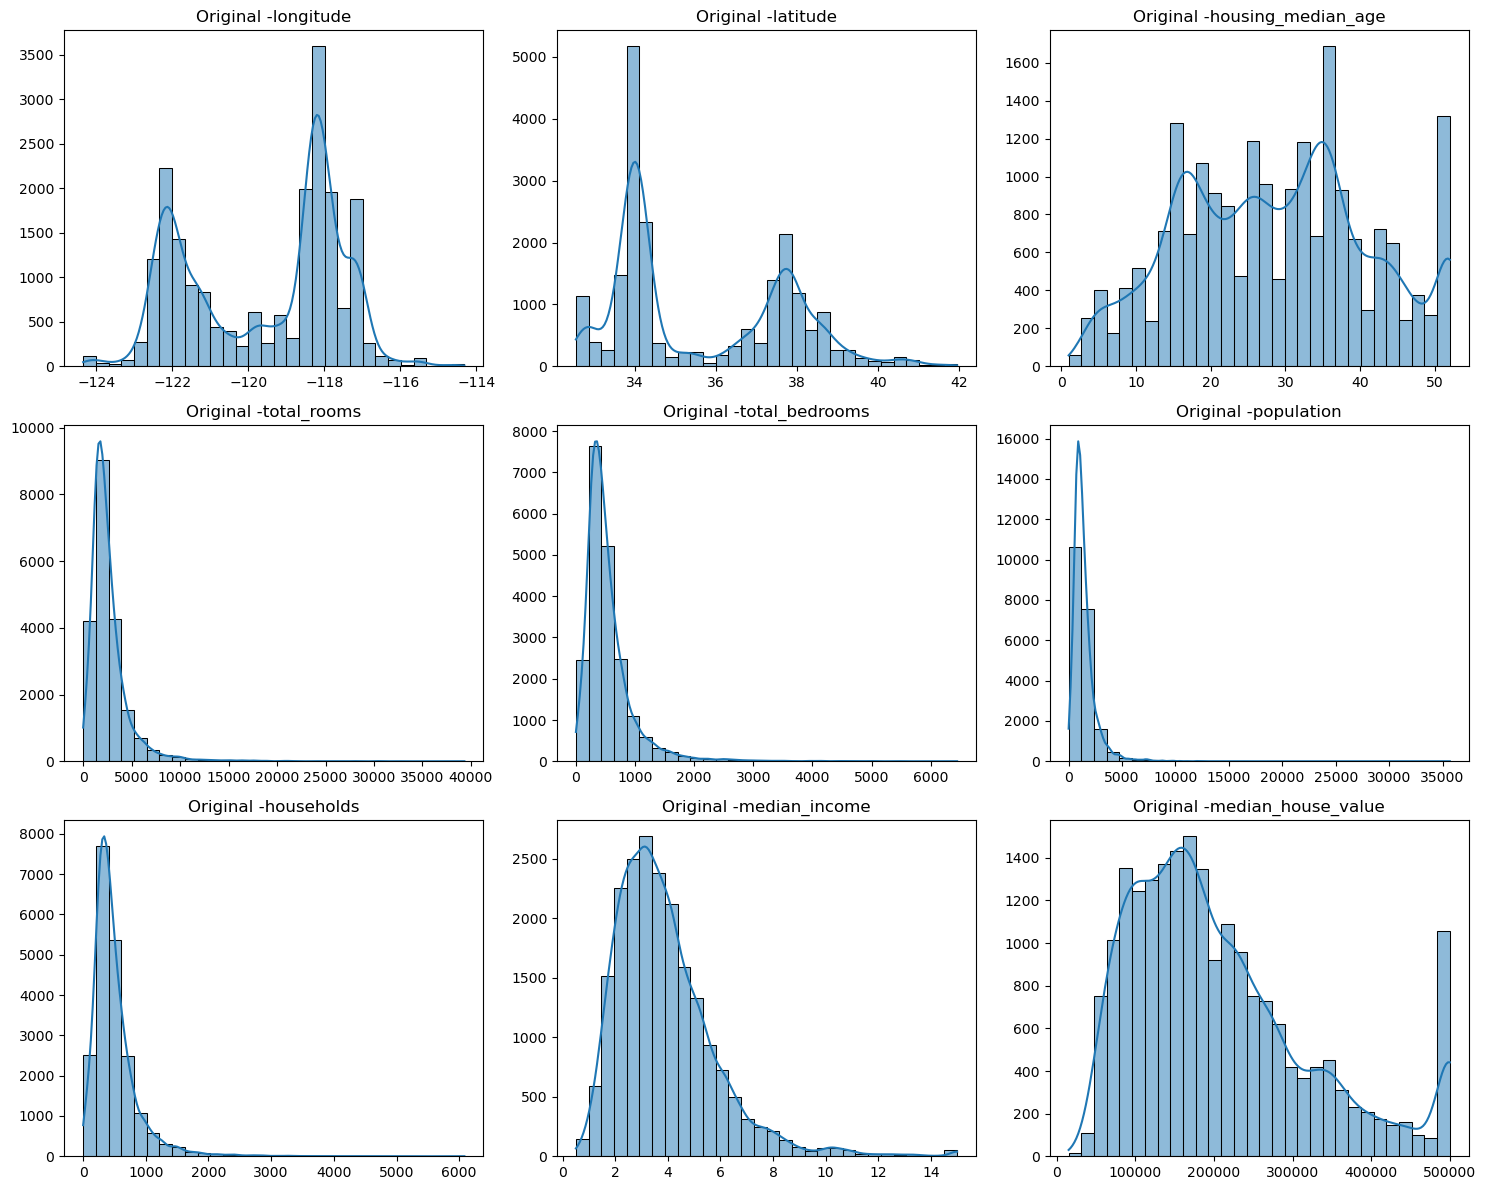

In [50]:
plot_all_histograms(df, title_prefix="Original -")

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
pt_X = PowerTransformer(method="yeo-johnson")

In [53]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [66]:
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income', 
                'ocean_proximity_INLAND','ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
                'ocean_proximity_NEAR OCEAN']
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=column_names)

In [67]:
X_train_transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.415534e-15,-0.671004,0.486589,0.050535,0.024399,0.358262,0.058133,-0.018646,1.411199,-0.014801,-0.340747,-0.375912
1,2.525757e-15,-1.204074,-0.970340,0.432472,0.522800,0.628352,0.363502,-0.940026,-0.708617,-0.014801,-0.340747,-0.375912
2,2.109424e-15,-0.721614,0.022996,0.305957,0.685602,0.800713,0.621156,-0.907275,1.411199,-0.014801,-0.340747,-0.375912
3,1.498801e-15,-0.972148,-0.296774,0.225063,0.655914,0.434484,0.557085,-0.254036,-0.708617,-0.014801,-0.340747,-0.375912
4,-2.775558e-15,1.423087,-0.056065,-0.548070,-0.448934,-0.944478,-0.697868,-2.133232,1.411199,-0.014801,-0.340747,-0.375912
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,1.249001e-15,-0.696219,-0.056065,-0.355082,-0.693242,-0.593331,-0.599422,1.324302,-0.708617,-0.014801,-0.340747,-0.375912
13694,-2.386980e-15,0.937391,0.637451,0.043574,0.083895,0.721670,0.110812,-0.815634,-0.708617,-0.014801,2.934729,-0.375912
13695,4.135581e-15,-1.599059,0.179499,-1.336357,-1.128894,-0.681751,-1.090558,-1.525335,1.411199,-0.014801,-0.340747,-0.375912
13696,1.054712e-15,-0.779420,0.256983,0.340278,0.660509,0.741306,0.522974,0.058431,-0.708617,-0.014801,-0.340747,-0.375912


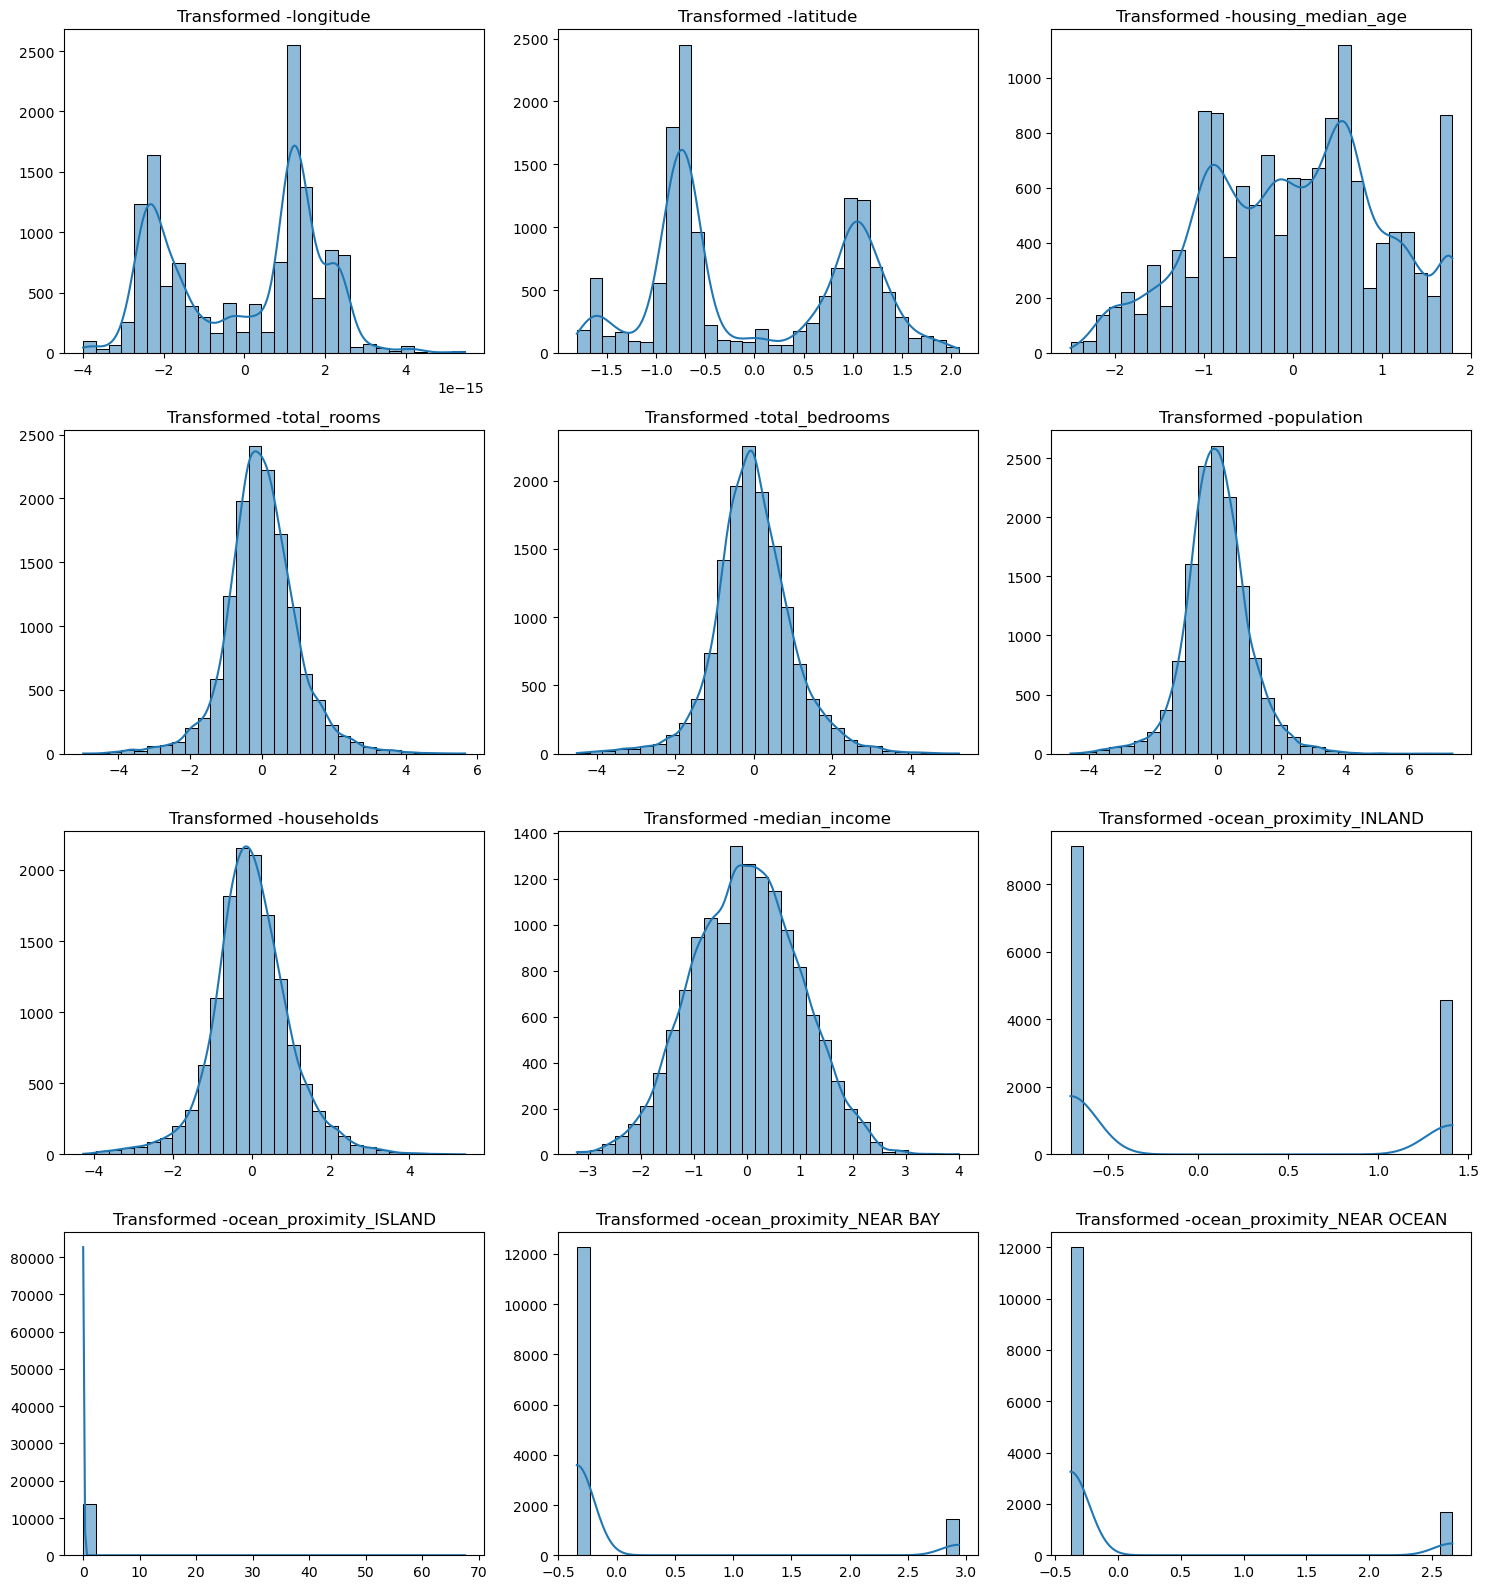

In [56]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed -")

In [57]:
from scipy.stats import boxcox

In [58]:
y_train_transformed, lambda_y = boxcox(y_train)

In [68]:
model = XGBRegressor()
model.fit(X_train, y_train_transformed)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [74]:
y_pred_transformed = model.predict(X_test)

In [75]:
print(r2_score(y_pred_transformed, y_test))
print(mean_squared_error(y_pred_transformed, y_test))

-444414705.83302385
45879989090.88345


In [76]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [77]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [78]:
print(r2_score(y_pred_original, y_test))
print(mean_squared_error(y_pred_original, y_test))

0.7597685137367356
1793236465.164395
